# Radio Imaging

#### Abstract - 2.5 points

We set out to use the Angell Hall SRT to azimuthally and elevationally map out the sun. We import the SRT data to compute the total flux at each offset position, in both azimuth and elevation, and fit a gaussian curve to the plot of the total flux vs offset angle. We then comput the FWHM of this gaussian funtion, which gives us the beamwidth. For the azimuth scan, we compute a FWHM of 7.88 degrees, and for the elevation scan, we compute a FWHM of 6.73 degrees. We note the angular diamaeter of the sun to be 0.53 degrees, which is much smaller than the beamwidth of the SRT, and thus conclude that the measured beamwidth is accurate (If the sun were larger than the beamwidth, than the computed beam would be larger than the telescopes beam).

#### Introduction - 2.5 points

For almost the entire history of astronomy, visible light was everything. From ancient viewing of the heavens using naked eyes, to using telescopes to observevarious distant celestial objects, it seems natural that light would be the only way to observe astrophysical phenomena. There was no knowledge, and thus the engineering ability, to view the sky using light of different wavelengths, such as x-ray, infrared, or radio. Radio waves are the lowest classification on the electromagnetic spectrum in energy. They have a very long wavelength, and can travel unimpeded through interstellar gas and dust, since light with shorter wavelengths have a higher likelihood of being absorbed or scattered. This is partly due to the quantized energy states in atoms, meaning with less energy than this amount is not absorbed at all. 

The area of radio astronomy was tentatively opened around 80 years ago, by a rather serendipitous discovery, in 1932. Karl Jansky, a radio engineer at Bell Lab in New Jersey, was tasked with finding the source of annoying background radio interference in calls to Europe, as back in those days’ calls were transmitted across the ocean through radio waves. By 1935, Jansky identified the source of noise to be a region in the sky close to the center of the Milky Way. This was entirely unexpected, as the only significant source of radio emission should have been, without any doubt, the sun, as it is the largest emitter of light in any wavelength, in the sky. This discovery, as amazing as it seems now, garnered almost no attention from the astronomy community. Proposals from several astronomers to build proper radio telescopes to investigate were turned down. In the decade following Jansky's discovery, the only person to investigate further was a man by the name of Grote Reber, a ham radio operator and electrical engineer, who built an amateur radio telescope in his backyard.



#### Theory - 10 points

The beam is the area on the sky on wich the radio telescope will detect radiation. The telescope theoretically should receive the radiation coming in along through the beam of the telescope, meaning it is essentially a measure of the area size the telescope is sensitive to radiation. Smaller telescopes have wider beams.
Because the telescope can still be sensitive to radiation that eneters the telescope at an angle, we can think of the incoming, off-center radiation as not being as sensitive to the telescope as radiation straight on. Thus, the width of the beam, or beamwidth, is the angle between the half-maximum points of te incoming radiation.a. FWHM). This beamwidth is the dtandad measure of a radio telescopes resolution. 

Consider a light wavelength $\lambda$, and telescope diameter $D$. For a telescope with an aperture that is uniformly illuminated, its diffraction limit is given by 
$$resolution = 1.22\cdot \frac{\lambda}{D}$$

In a radio telescope, the large reflecting dish focuses incoming radio waves from the direction the telescope is facing onto the horn. The angular resolution as stated above is the beamwidth, or the FWHM of the main beam. For a uniformuly illuminated radio dish, the angular resolution is :

$$ \theta_{FWHM} = 1.02 \cdot \frac{\lambda}{D}$$
, in units of radians.

However, because the center of the dish of the telescope is generally more effective at collection light than the edges, a more accurate expression for the resolution taking this into account is given by:

$$ \theta_{FWHM} = 1.15 \cdot \frac{\lambda}{D}$$


#### Experiment and Methodology

#### NOTE: As Professor Monier has mentioned, due to telescope malfunction during data taking process, our group was not able to obtain observations for elevations of positive 8 and 10 degrees. Additionally, the telescope mistakenly recorded the negative 6 degree elevation observation at negative 9 degree elevation. 
#### So, we are missing three data points in total for the elevation scans, with an extra observation at negative 9 degree elevation. Thus, the gaussian fit for the total flux vs offset for the elevation data will be slightly intrinsically errored due to these missing data points. 

In [300]:
import numpy as np
import scipy
from scipy.integrate import simps
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import curve_fit
%matplotlib inline

In [301]:
# We rename the p10 and m10 files as m01 for loop simplicity

sun_el_p = []
for i in [2,4,6]:  # data taking not finished for this array due to telescope malfunction
    file1 = open('sun_el_p0'+str(i))
    file_read1 = file1.read()
    file1.close
    sun_el_p.append(file_read1)
    
sun_el_m = []
for i in [0,1,2,4,6,8]:
    file2 = open('sun_el_m0'+str(i))
    file_read2 = file2.read()
    file2.close
    sun_el_m.append(file_read2)
    
sun_az_m = []
for i in [0,1,2,4,6,8]:
    file3 = open('sun_az_m0'+str(i))
    file_read3 = file3.read()
    file3.close
    sun_az_m.append(file_read3)
    
sun_az_p = []
for i in [1,2,4,6,8]:
    file4 = open('sun_az_p0'+str(i))
    file_read4 = file4.read()
    file4.close
    sun_az_p.append(file_read4)

elp2,elp4,elp6 = sun_el_p[0].split('\n'),sun_el_p[1].split('\n'),sun_el_p[2].split('\n')
elm0,elm10,elm2,elm4,elm6,elm8 = sun_el_m[0].split('\n'),sun_el_m[1].split('\n'),sun_el_m[2].split('\n'),sun_el_m[3].split('\n'),sun_el_m[4].split('\n'),sun_el_m[5].split('\n') 
azm0,azm10,azm2,azm4,azm6,azm8 = sun_az_m[0].split('\n'),sun_az_m[1].split('\n'),sun_az_m[2].split('\n'),sun_az_m[3].split('\n'),sun_az_m[4].split('\n'),sun_az_m[5].split('\n')
azp10,azp2,azp4,azp6,azp8 = sun_az_p[0].split('\n'),sun_az_p[1].split('\n'),sun_az_p[2].split('\n'),sun_az_p[3].split('\n'),sun_az_p[4].split('\n')
#print(azm0)
#elp2_row,elp4_row,elp6_row = elp2[]

Because of the inconsistent number of scans within each data file (some have 5, others 6), we manually average the spectrum data in each file manually, rather than looping.

In [302]:
elp2_row = np.array([elp2[i] for i in [3,7,11,15,19]])
elp4_row = np.array([elp4[i] for i in [3,7,11,15,19]])
elp6_row = np.array([elp6[i] for i in [3,7,11,15,19]])
elm0_row = np.array([elm0[i] for i in [3,7,11,15,19]])
elm10_row = np.array([elm10[i] for i in [3,7,11,15,19,23]])
elm2_row = np.array([elm2[i] for i in [3,7,11,15,19]])
elm4_row = np.array([elm4[i] for i in [3,7,11,15,19]])
elm6_row = np.array([elm6[i] for i in [3,7,11,15,19,23]])
elm8_row = np.array([elm8[i] for i in [3,7,11,15]])
azm0_row = np.array([azm0[i] for i in [3,7,11,15,19,23]])
azm10_row = np.array([azm10[i] for i in [3,7,11,15,19,23]])
azm2_row = np.array([azm2[i] for i in [3,7,11,15,19,23]])
azm4_row = np.array([azm4[i] for i in [3,7,11,15,19,23]])
azm6_row = np.array([azm6[i] for i in [3,7,11,15,19,23]])
azm8_row = np.array([azm8[i] for i in [3,7,11,15,19]])
azp10_row = np.array([azp10[i] for i in [3,7,11,15,19,23]])
azp2_row = np.array([azp2[i] for i in [3,7,11,15,19,23]])
azp4_row = np.array([azp4[i] for i in [3,7,11,15,19,23]])
azp6_row = np.array([azp6[i] for i in [3,7,11,15,19,23]])
azp8_row = np.array([azp8[i] for i in [3,7,11,15,19,23]])
#print(elp2_row[4])
#elp2_row_split = np.float64(elp2_row.split())
#print(elp2_row_split[1023])
elp2_row_avg = (np.float64(elp2_row[0].split())+np.float64(elp2_row[1].split())\
                +np.float64(elp2_row[2].split())+np.float64(elp2_row[3].split())+np.float64(elp2_row[4].split()))/5 
elp4_row_avg = (np.float64(elp4_row[0].split())+np.float64(elp4_row[1].split())\
                +np.float64(elp4_row[2].split())+np.float64(elp4_row[3].split())+np.float64(elp4_row[4].split()))/5 
elp6_row_avg = (np.float64(elp6_row[0].split())+np.float64(elp6_row[1].split())\
                +np.float64(elp6_row[2].split())+np.float64(elp6_row[3].split())+np.float64(elp6_row[4].split()))/5 
elm0_row_avg = (np.float64(elm0_row[0].split())+np.float64(elm0_row[1].split())\
                +np.float64(elm0_row[2].split())+np.float64(elm0_row[3].split())+np.float64(elm0_row[4].split()))/5
elm10_row_avg = (np.float64(elm10_row[0].split())+np.float64(elm10_row[1].split())\
                +np.float64(elm10_row[2].split())+np.float64(elm10_row[3].split())\
                +np.float64(elm10_row[4].split())+np.float64(elm10_row[5].split()))/6
elm2_row_avg = (np.float64(elm2_row[0].split())+np.float64(elm2_row[1].split())\
                +np.float64(elm2_row[2].split())+np.float64(elm2_row[3].split())+np.float64(elm2_row[4].split()))/5
elm4_row_avg = (np.float64(elm4_row[0].split())+np.float64(elm4_row[1].split())\
                +np.float64(elm4_row[2].split())+np.float64(elm4_row[3].split())+np.float64(elm4_row[4].split()))/5
elm6_row_avg = (np.float64(elm6_row[0].split())+np.float64(elm6_row[1].split())\
                +np.float64(elm6_row[2].split())+np.float64(elm6_row[3].split())\
                +np.float64(elm6_row[4].split())+np.float64(elm6_row[5].split()))/6
elm8_row_avg = (np.float64(elm8_row[0].split())+np.float64(elm8_row[1].split())\
                +np.float64(elm8_row[2].split())+np.float64(elm8_row[3].split()))/4
azm0_row_avg =  (np.float64(azm0_row[0].split())+np.float64(azm0_row[1].split())\
                +np.float64(azm0_row[2].split())+np.float64(azm0_row[3].split())\
                +np.float64(azm0_row[4].split())+np.float64(azm0_row[5].split()))/6
azm10_row_avg = (np.float64(azm10_row[0].split())+np.float64(azm10_row[1].split())\
                +np.float64(azm10_row[2].split())+np.float64(azm10_row[3].split())\
                +np.float64(azm10_row[4].split())+np.float64(azm10_row[5].split()))/6
azm2_row_avg = (np.float64(azm2_row[0].split())+np.float64(azm2_row[1].split())\
                +np.float64(azm2_row[2].split())+np.float64(azm2_row[3].split())\
                +np.float64(azm2_row[4].split())+np.float64(azm2_row[5].split()))/6
azm4_row_avg = (np.float64(azm4_row[0].split())+np.float64(azm4_row[1].split())\
                +np.float64(azm4_row[2].split())+np.float64(azm4_row[3].split())\
                +np.float64(azm4_row[4].split())+np.float64(azm4_row[5].split()))/6
azm6_row_avg = (np.float64(azm6_row[0].split())+np.float64(azm6_row[1].split())\
                +np.float64(azm6_row[2].split())+np.float64(azm6_row[3].split())\
                +np.float64(azm6_row[4].split())+np.float64(azm6_row[5].split()))/6
azm8_row_avg = (np.float64(azm8_row[0].split())+np.float64(azm8_row[1].split())\
                +np.float64(azm8_row[2].split())+np.float64(azm8_row[3].split())\
                +np.float64(azm8_row[4].split()))/5
azp10_row_avg = (np.float64(azp10_row[0].split())+np.float64(azp10_row[1].split())\
                +np.float64(azp10_row[2].split())+np.float64(azp10_row[3].split())\
                +np.float64(azp10_row[4].split())+np.float64(azp10_row[5].split()))/6
azp2_row_avg = (np.float64(azp2_row[0].split())+np.float64(azp2_row[1].split())\
                +np.float64(azp2_row[2].split())+np.float64(azp2_row[3].split())\
                +np.float64(azp2_row[4].split())+np.float64(azp2_row[5].split()))/6
azp4_row_avg = (np.float64(azp4_row[0].split())+np.float64(azp4_row[1].split())\
                +np.float64(azp4_row[2].split())+np.float64(azp4_row[3].split())\
                +np.float64(azp4_row[4].split())+np.float64(azp4_row[5].split()))/6
azp6_row_avg = (np.float64(azp6_row[0].split())+np.float64(azp6_row[1].split())\
                +np.float64(azp6_row[2].split())+np.float64(azp6_row[3].split())\
                +np.float64(azp6_row[4].split())+np.float64(azp6_row[5].split()))/6
azp8_row_avg = (np.float64(azp8_row[0].split())+np.float64(azp8_row[1].split())\
                +np.float64(azp8_row[2].split())+np.float64(azp8_row[3].split())\
                +np.float64(azp8_row[4].split())+np.float64(azp8_row[5].split()))/6

In [303]:
rcParams['figure.figsize'] = (25., 12.)

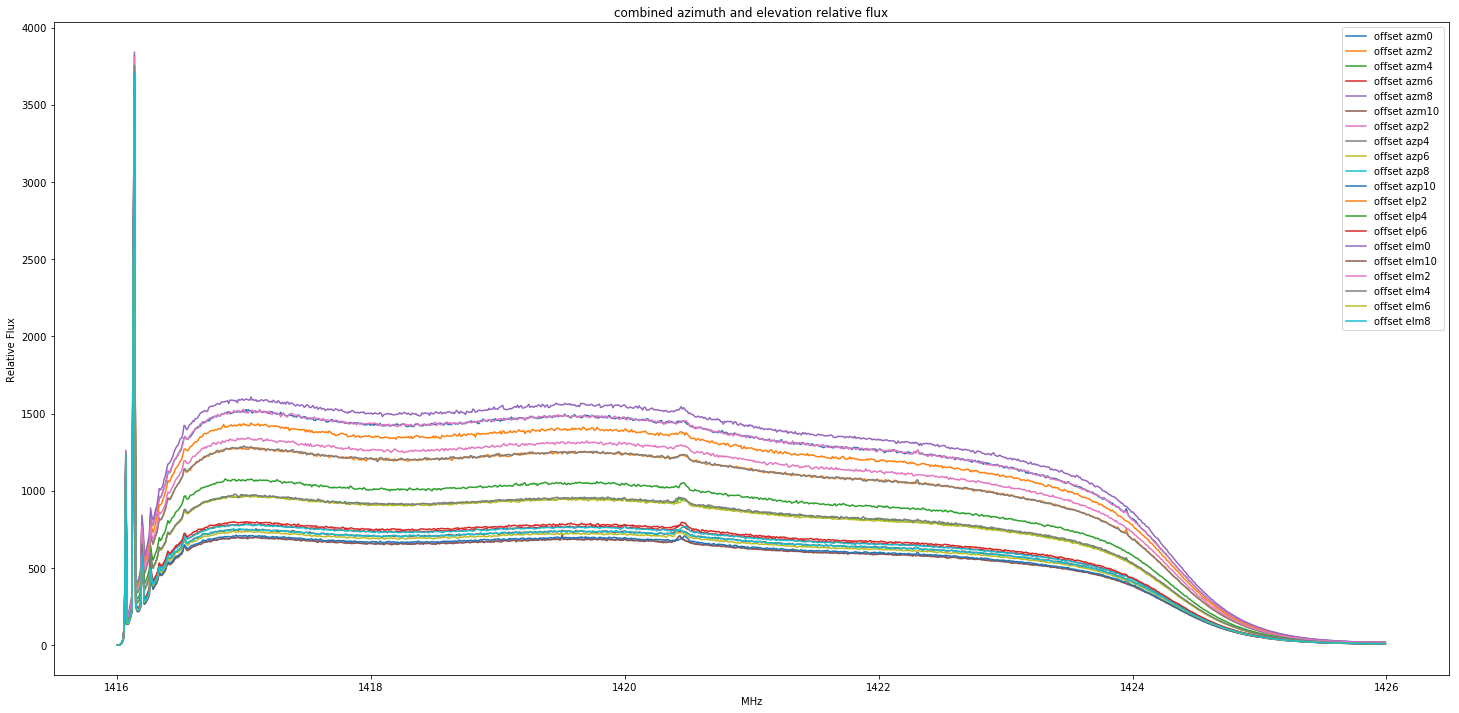

In [304]:
frequency = np.arange(1416,1426,0.009766)
plt.plot(frequency,azm0_row_avg,label="offset azm0")
plt.plot(frequency,azm2_row_avg,label="offset azm2")
plt.plot(frequency,azm4_row_avg,label="offset azm4")
plt.plot(frequency,azm6_row_avg,label="offset azm6")
plt.plot(frequency,azm8_row_avg,label="offset azm8")
plt.plot(frequency,azm10_row_avg,label="offset azm10")
plt.plot(frequency,azp2_row_avg,label="offset azp2")
plt.plot(frequency,azp4_row_avg,label="offset azp4")
plt.plot(frequency,azp6_row_avg,label="offset azp6")
plt.plot(frequency,azp8_row_avg,label="offset azp8")
plt.plot(frequency,azp10_row_avg,label="offset azp10")

plt.plot(frequency,elp2_row_avg,label="offset elp2")
plt.plot(frequency,elp4_row_avg,label="offset elp4")
plt.plot(frequency,elp6_row_avg,label="offset elp6")
plt.plot(frequency,elm0_row_avg,label="offset elm0")
plt.plot(frequency,elm10_row_avg,label="offset elm10")
plt.plot(frequency,elm2_row_avg,label="offset elm2")
plt.plot(frequency,elm4_row_avg,label="offset elm4")
plt.plot(frequency,elm6_row_avg,label="offset elm6")
plt.plot(frequency,elm8_row_avg,label="offset elm8")

plt.legend()
plt.xlabel("MHz")
plt.ylabel("Relative Flux")
plt.title("combined azimuth and elevation relative flux")
plt.show()

In the figure above, we plot the continuum flux for all offset observations using the SRT from the Sun's central position. From the plot, we see two general area of radio interference spikes: one large area at the start of the plot, and also a smaller one at ~1420.5 Mhz. A third and fourth one can be seen at ~1422 MHz and ~1424 MHz, but they are extremely small, and can be safely ignored as it will not significantly affect our integral calculation. Thus, we will integrate two general regions. We will apply the same region of integration to both the elevation and azimuth data in order have a consistent flux measurement among all offsets.

In [305]:
### first region ###

# start from 1417
start = np.int(np.floor((1417-1416)/0.009766))
#print(start)

# start at index 102
### second region ###
start2 = np.int(np.floor((1420-1416)/0.009766))  # start and stop of the general region of spike - will print out 
stop2 = np.int(np.floor(start2 + (1/0.009766)))   # and narrow by inspection
#print(start2,stop2)
#azm6_row_avg[start2:stop2]
#azm10_row_avg[start2:stop2]

# remove region index 430 to 470

Through manual inspection of several data files, we conclude that we will integrate starting from index 102, and exclude indexes 430 to 470.

In [306]:
elp2_int = scipy.integrate.simps(elp2_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(elp2_row_avg[470:],frequency[470:])
elp4_int = scipy.integrate.simps(elp4_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(elp4_row_avg[470:],frequency[470:])
elp6_int = scipy.integrate.simps(elp6_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(elp6_row_avg[470:],frequency[470:])
elm0_int = scipy.integrate.simps(elm0_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(elm0_row_avg[470:],frequency[470:])
elm10_int = scipy.integrate.simps(elm10_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(elm10_row_avg[470:],frequency[470:])
elm2_int = scipy.integrate.simps(elm2_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(elm2_row_avg[470:],frequency[470:])
elm4_int = scipy.integrate.simps(elm4_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(elm4_row_avg[470:],frequency[470:])
elm6_int = scipy.integrate.simps(elm6_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(elm6_row_avg[470:],frequency[470:])
elm8_int = scipy.integrate.simps(elm8_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(elm8_row_avg[470:],frequency[470:])

azm0_int = scipy.integrate.simps(azm0_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(azm0_row_avg[470:],frequency[470:])
azm10_int = scipy.integrate.simps(azm10_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(azm10_row_avg[470:],frequency[470:])
azm2_int = scipy.integrate.simps(azm2_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(azm2_row_avg[470:],frequency[470:])
azm4_int = scipy.integrate.simps(azm4_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(azm4_row_avg[470:],frequency[470:])
azm6_int = scipy.integrate.simps(azm6_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(azm6_row_avg[470:],frequency[470:])
azm8_int = scipy.integrate.simps(azm8_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(azm8_row_avg[470:],frequency[470:])
azp10_int = scipy.integrate.simps(azp10_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(azp10_row_avg[470:],frequency[470:])
azp2_int = scipy.integrate.simps(azp2_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(azp2_row_avg[470:],frequency[470:])
azp4_int = scipy.integrate.simps(azp4_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(azp4_row_avg[470:],frequency[470:])
azp6_int = scipy.integrate.simps(azp6_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(azp6_row_avg[470:],frequency[470:])
azp8_int = scipy.integrate.simps(azp8_row_avg[102:431],frequency[102:431]) + scipy.integrate.simps(azp8_row_avg[470:],frequency[470:])

here we compute the error bars for each total flux data point

In [307]:
xerr_az = np.zeros(11)
yerr_az = np.zeros(11)
xerr_el = np.zeros(9)
yerr_el = np.zeros(9)

In [308]:
elp2_0 = (np.float64(elp2_row[0].split()))
elp2_1 = (np.float64(elp2_row[1].split()))
elp2_2 = (np.float64(elp2_row[2].split()))
elp2_3 = (np.float64(elp2_row[3].split()))
elp2_4 = (np.float64(elp2_row[4].split()))
elp4_0 = (np.float64(elp4_row[0].split()))
elp4_1 = (np.float64(elp4_row[1].split()))
elp4_2 = (np.float64(elp4_row[2].split()))
elp4_3 = (np.float64(elp4_row[3].split()))
elp4_4 = (np.float64(elp4_row[4].split()))
elp6_0 = (np.float64(elp6_row[0].split()))
elp6_1 = (np.float64(elp6_row[1].split()))
elp6_2 = (np.float64(elp6_row[2].split()))
elp6_3 = (np.float64(elp6_row[3].split()))
elp6_4 = (np.float64(elp6_row[4].split()))
elm0_0 = (np.float64(elm0_row[0].split()))
elm0_1 = (np.float64(elm0_row[1].split()))
elm0_2 = (np.float64(elm0_row[2].split()))
elm0_3 = (np.float64(elm0_row[3].split()))
elm0_4 = (np.float64(elm0_row[4].split()))
elm2_0 = (np.float64(elm2_row[0].split()))
elm2_1 = (np.float64(elm2_row[1].split()))
elm2_2 = (np.float64(elm2_row[2].split()))
elm2_3 = (np.float64(elm2_row[3].split()))
elm2_4 = (np.float64(elm2_row[4].split()))
elm4_0 = (np.float64(elm4_row[0].split()))
elm4_1 = (np.float64(elm4_row[1].split()))
elm4_2 = (np.float64(elm4_row[2].split()))
elm4_3 = (np.float64(elm4_row[3].split()))
elm4_4 = (np.float64(elm4_row[4].split()))
elm6_0 = (np.float64(elm6_row[0].split()))
elm6_1 = (np.float64(elm6_row[1].split()))
elm6_2 = (np.float64(elm6_row[2].split()))
elm6_3 = (np.float64(elm6_row[3].split()))
elm6_4 = (np.float64(elm6_row[4].split()))
elm8_0 = (np.float64(elm8_row[0].split()))
elm8_1 = (np.float64(elm8_row[1].split()))
elm8_2 = (np.float64(elm8_row[2].split()))
elm8_3 = (np.float64(elm8_row[3].split()))
elm10_0 = (np.float64(elm10_row[0].split()))
elm10_1 = (np.float64(elm10_row[1].split()))
elm10_2 = (np.float64(elm10_row[2].split()))
elm10_3 = (np.float64(elm10_row[3].split()))
elm10_4 = (np.float64(elm10_row[4].split()))

elp2_0int = scipy.integrate.simps(elp2_0[102:431],frequency[102:431]) + scipy.integrate.simps(elp2_0[470:],frequency[470:]) 
elp2_1int = scipy.integrate.simps(elp2_1[102:431],frequency[102:431]) + scipy.integrate.simps(elp2_1[470:],frequency[470:])
elp2_2int = scipy.integrate.simps(elp2_2[102:431],frequency[102:431]) + scipy.integrate.simps(elp2_2[470:],frequency[470:])
elp2_3int = scipy.integrate.simps(elp2_3[102:431],frequency[102:431]) + scipy.integrate.simps(elp2_3[470:],frequency[470:])
elp2_4int = scipy.integrate.simps(elp2_4[102:431],frequency[102:431]) + scipy.integrate.simps(elp2_4[470:],frequency[470:])
elp4_0int = scipy.integrate.simps(elp4_0[102:431],frequency[102:431]) + scipy.integrate.simps(elp4_0[470:],frequency[470:]) 
elp4_1int = scipy.integrate.simps(elp4_1[102:431],frequency[102:431]) + scipy.integrate.simps(elp4_1[470:],frequency[470:])
elp4_2int = scipy.integrate.simps(elp4_2[102:431],frequency[102:431]) + scipy.integrate.simps(elp4_2[470:],frequency[470:])
elp4_3int = scipy.integrate.simps(elp4_3[102:431],frequency[102:431]) + scipy.integrate.simps(elp4_3[470:],frequency[470:])
elp4_4int = scipy.integrate.simps(elp4_4[102:431],frequency[102:431]) + scipy.integrate.simps(elp4_4[470:],frequency[470:])
elp6_0int = scipy.integrate.simps(elp6_0[102:431],frequency[102:431]) + scipy.integrate.simps(elp6_0[470:],frequency[470:])
elp6_1int = scipy.integrate.simps(elp6_1[102:431],frequency[102:431]) + scipy.integrate.simps(elp6_1[470:],frequency[470:])
elp6_2int = scipy.integrate.simps(elp6_2[102:431],frequency[102:431]) + scipy.integrate.simps(elp6_2[470:],frequency[470:])
elp6_3int = scipy.integrate.simps(elp6_3[102:431],frequency[102:431]) + scipy.integrate.simps(elp6_3[470:],frequency[470:])
elp6_4int = scipy.integrate.simps(elp6_4[102:431],frequency[102:431]) + scipy.integrate.simps(elp6_4[470:],frequency[470:])
elm2_0int = scipy.integrate.simps(elm2_0[102:431],frequency[102:431]) + scipy.integrate.simps(elm2_0[470:],frequency[470:])
elm2_1int = scipy.integrate.simps(elm2_1[102:431],frequency[102:431]) + scipy.integrate.simps(elm2_1[470:],frequency[470:])
elm2_2int = scipy.integrate.simps(elm2_2[102:431],frequency[102:431]) + scipy.integrate.simps(elm2_2[470:],frequency[470:])
elm2_3int = scipy.integrate.simps(elm2_3[102:431],frequency[102:431]) + scipy.integrate.simps(elm2_3[470:],frequency[470:])
elm2_4int = scipy.integrate.simps(elm2_4[102:431],frequency[102:431]) + scipy.integrate.simps(elm2_4[470:],frequency[470:])
elm4_0int = scipy.integrate.simps(elm4_0[102:431],frequency[102:431]) + scipy.integrate.simps(elm4_0[470:],frequency[470:])
elm4_1int = scipy.integrate.simps(elm4_1[102:431],frequency[102:431]) + scipy.integrate.simps(elm4_1[470:],frequency[470:])
elm4_2int = scipy.integrate.simps(elm4_2[102:431],frequency[102:431]) + scipy.integrate.simps(elm4_2[470:],frequency[470:])
elm4_3int = scipy.integrate.simps(elm4_3[102:431],frequency[102:431]) + scipy.integrate.simps(elm4_3[470:],frequency[470:])
elm4_4int = scipy.integrate.simps(elm4_4[102:431],frequency[102:431]) + scipy.integrate.simps(elm4_4[470:],frequency[470:])
elm6_0int = scipy.integrate.simps(elm6_0[102:431],frequency[102:431]) + scipy.integrate.simps(elm6_0[470:],frequency[470:])
elm6_1int = scipy.integrate.simps(elm6_1[102:431],frequency[102:431]) + scipy.integrate.simps(elm6_1[470:],frequency[470:])
elm6_2int = scipy.integrate.simps(elm6_2[102:431],frequency[102:431]) + scipy.integrate.simps(elm6_2[470:],frequency[470:])
elm6_3int = scipy.integrate.simps(elm6_3[102:431],frequency[102:431]) + scipy.integrate.simps(elm6_3[470:],frequency[470:])
elm6_4int = scipy.integrate.simps(elm6_4[102:431],frequency[102:431]) + scipy.integrate.simps(elm6_4[470:],frequency[470:])
elm8_0int = scipy.integrate.simps(elm8_0[102:431],frequency[102:431]) + scipy.integrate.simps(elm8_0[470:],frequency[470:])
elm8_1int = scipy.integrate.simps(elm8_1[102:431],frequency[102:431]) + scipy.integrate.simps(elm8_1[470:],frequency[470:])
elm8_2int = scipy.integrate.simps(elm8_2[102:431],frequency[102:431]) + scipy.integrate.simps(elm8_2[470:],frequency[470:])
elm8_3int = scipy.integrate.simps(elm8_3[102:431],frequency[102:431]) + scipy.integrate.simps(elm8_3[470:],frequency[470:])
elm10_0int = scipy.integrate.simps(elm10_0[102:431],frequency[102:431]) + scipy.integrate.simps(elm10_0[470:],frequency[470:])
elm10_1int = scipy.integrate.simps(elm10_1[102:431],frequency[102:431]) + scipy.integrate.simps(elm10_1[470:],frequency[470:])
elm10_2int = scipy.integrate.simps(elm10_2[102:431],frequency[102:431]) + scipy.integrate.simps(elm10_2[470:],frequency[470:])
elm10_3int = scipy.integrate.simps(elm10_3[102:431],frequency[102:431]) + scipy.integrate.simps(elm10_3[470:],frequency[470:])
elm10_4int = scipy.integrate.simps(elm10_4[102:431],frequency[102:431]) + scipy.integrate.simps(elm10_4[470:],frequency[470:])
elm0_0int = scipy.integrate.simps(elm0_0[102:431],frequency[102:431]) + scipy.integrate.simps(elm0_0[470:],frequency[470:])
elm0_1int = scipy.integrate.simps(elm0_1[102:431],frequency[102:431]) + scipy.integrate.simps(elm0_1[470:],frequency[470:])
elm0_2int = scipy.integrate.simps(elm0_2[102:431],frequency[102:431]) + scipy.integrate.simps(elm0_2[470:],frequency[470:])
elm0_3int = scipy.integrate.simps(elm0_3[102:431],frequency[102:431]) + scipy.integrate.simps(elm0_3[470:],frequency[470:])
elm0_4int = scipy.integrate.simps(elm0_4[102:431],frequency[102:431]) + scipy.integrate.simps(elm0_4[470:],frequency[470:])


yerr_el[6] = (np.std([elp2_0int,elp2_1int,elp2_2int,elp2_3int,elp2_4int])) / np.sqrt(5)
yerr_el[7] = (np.std([elp4_0int,elp4_1int,elp4_2int,elp4_3int,elp4_4int])) / np.sqrt(5)
yerr_el[8] = (np.std([elp6_0int,elp6_1int,elp6_2int,elp6_3int,elp6_4int])) / np.sqrt(5)
yerr_el[0] = (np.std([elm10_0int,elm10_1int,elm10_2int,elm10_3int,elm10_4int])) / np.sqrt(5)
yerr_el[5] = (np.std([elm0_0int,elm0_1int,elm0_2int,elm0_3int,elm0_4int])) / np.sqrt(5)
yerr_el[1] = (np.std([elm8_0int,elm8_1int,elm8_2int,elm8_3int])) / np.sqrt(4)
yerr_el[2] = (np.std([elm6_0int,elm6_1int,elm6_2int,elm6_3int,elm6_4int])) / np.sqrt(5)
yerr_el[3] = (np.std([elm4_0int,elm4_1int,elm4_2int,elm4_3int,elm4_4int])) / np.sqrt(5)
yerr_el[4] = (np.std([elm2_0int,elm2_1int,elm2_2int,elm2_3int,elm2_4int])) / np.sqrt(5)

In [309]:
azm10_0 = (np.float64(azm10_row[0].split()))
azm10_1 = (np.float64(azm10_row[1].split()))
azm10_2 = (np.float64(azm10_row[2].split()))
azm10_3 = (np.float64(azm10_row[3].split()))
azm10_4 = (np.float64(azm10_row[4].split()))
azm8_0 = (np.float64(azm8_row[0].split()))
azm8_1 = (np.float64(azm8_row[1].split()))
azm8_2 = (np.float64(azm8_row[2].split()))
azm8_3 = (np.float64(azm8_row[3].split()))
azm8_4 = (np.float64(azm8_row[4].split()))
azm6_0 = (np.float64(azm6_row[0].split()))
azm6_1 = (np.float64(azm6_row[1].split()))
azm6_2 = (np.float64(azm6_row[2].split()))
azm6_3 = (np.float64(azm6_row[3].split()))
azm6_4 = (np.float64(azm6_row[4].split()))
azm4_0 = (np.float64(azm4_row[0].split()))
azm4_1 = (np.float64(azm4_row[1].split()))
azm4_2 = (np.float64(azm4_row[2].split()))
azm4_3 = (np.float64(azm4_row[3].split()))
azm4_4 = (np.float64(azm4_row[4].split()))
azm2_0 = (np.float64(azm2_row[0].split()))
azm2_1 = (np.float64(azm2_row[1].split()))
azm2_2 = (np.float64(azm2_row[2].split()))
azm2_3 = (np.float64(azm2_row[3].split()))
azm2_4 = (np.float64(azm2_row[4].split()))
azm0_0 = (np.float64(azm0_row[0].split()))
azm0_1 = (np.float64(azm0_row[1].split()))
azm0_2 = (np.float64(azm0_row[2].split()))
azm0_3 = (np.float64(azm0_row[3].split()))
azm0_4 = (np.float64(azm0_row[4].split()))
azp2_0 = (np.float64(azp2_row[0].split()))
azp2_1 = (np.float64(azp2_row[1].split()))
azp2_2 = (np.float64(azp2_row[2].split()))
azp2_3 = (np.float64(azp2_row[3].split()))
azp2_4 = (np.float64(azp2_row[4].split()))
azp4_0 = (np.float64(azp4_row[0].split()))
azp4_1 = (np.float64(azp4_row[1].split()))
azp4_2 = (np.float64(azp4_row[2].split()))
azp4_3 = (np.float64(azp4_row[3].split()))
azp6_0 = (np.float64(azp6_row[0].split()))
azp6_1 = (np.float64(azp6_row[1].split()))
azp6_2 = (np.float64(azp6_row[2].split()))
azp6_3 = (np.float64(azp8_row[3].split()))
azp8_0 = (np.float64(azp8_row[0].split()))
azp8_1 = (np.float64(azp8_row[1].split()))
azp8_2 = (np.float64(azp8_row[2].split()))
azp8_3 = (np.float64(azp8_row[3].split()))
azp10_0 = (np.float64(azp10_row[0].split()))
azp10_1 = (np.float64(azp10_row[1].split()))
azp10_2 = (np.float64(azp10_row[2].split()))
azp10_3 = (np.float64(azp10_row[3].split()))
azp10_4 = (np.float64(azp10_row[4].split()))

azp2_0int = scipy.integrate.simps(azp2_0[102:431],frequency[102:431]) + scipy.integrate.simps(azp2_0[470:],frequency[470:]) 
azp2_1int = scipy.integrate.simps(azp2_1[102:431],frequency[102:431]) + scipy.integrate.simps(azp2_1[470:],frequency[470:])
azp2_2int = scipy.integrate.simps(azp2_2[102:431],frequency[102:431]) + scipy.integrate.simps(azp2_2[470:],frequency[470:])
azp2_3int = scipy.integrate.simps(azp2_3[102:431],frequency[102:431]) + scipy.integrate.simps(azp2_3[470:],frequency[470:])
azp2_4int = scipy.integrate.simps(azp2_4[102:431],frequency[102:431]) + scipy.integrate.simps(azp2_4[470:],frequency[470:])
azp4_0int = scipy.integrate.simps(azp4_0[102:431],frequency[102:431]) + scipy.integrate.simps(azp4_0[470:],frequency[470:]) 
azp4_1int = scipy.integrate.simps(azp4_1[102:431],frequency[102:431]) + scipy.integrate.simps(azp4_1[470:],frequency[470:])
azp4_2int = scipy.integrate.simps(azp4_2[102:431],frequency[102:431]) + scipy.integrate.simps(azp4_2[470:],frequency[470:])
azp4_3int = scipy.integrate.simps(azp4_3[102:431],frequency[102:431]) + scipy.integrate.simps(azp4_3[470:],frequency[470:])
azp6_0int = scipy.integrate.simps(azp6_0[102:431],frequency[102:431]) + scipy.integrate.simps(azp6_0[470:],frequency[470:])
azp6_1int = scipy.integrate.simps(azp6_1[102:431],frequency[102:431]) + scipy.integrate.simps(azp6_1[470:],frequency[470:])
azp6_2int = scipy.integrate.simps(azp6_2[102:431],frequency[102:431]) + scipy.integrate.simps(azp6_2[470:],frequency[470:])
azp6_3int = scipy.integrate.simps(azp6_3[102:431],frequency[102:431]) + scipy.integrate.simps(azp6_3[470:],frequency[470:])
azp8_0int = scipy.integrate.simps(azp8_0[102:431],frequency[102:431]) + scipy.integrate.simps(azp8_0[470:],frequency[470:])
azp8_1int = scipy.integrate.simps(azp8_1[102:431],frequency[102:431]) + scipy.integrate.simps(azp8_1[470:],frequency[470:])
azp8_2int = scipy.integrate.simps(azp8_2[102:431],frequency[102:431]) + scipy.integrate.simps(azp8_2[470:],frequency[470:])
azp8_3int = scipy.integrate.simps(azp8_3[102:431],frequency[102:431]) + scipy.integrate.simps(azp8_3[470:],frequency[470:])
azm2_0int = scipy.integrate.simps(azm2_0[102:431],frequency[102:431]) + scipy.integrate.simps(azm2_0[470:],frequency[470:])
azm2_1int = scipy.integrate.simps(azm2_1[102:431],frequency[102:431]) + scipy.integrate.simps(azm2_1[470:],frequency[470:])
azm2_2int = scipy.integrate.simps(azm2_2[102:431],frequency[102:431]) + scipy.integrate.simps(azm2_2[470:],frequency[470:])
azm2_3int = scipy.integrate.simps(azm2_3[102:431],frequency[102:431]) + scipy.integrate.simps(azm2_3[470:],frequency[470:])
azm2_4int = scipy.integrate.simps(azm2_4[102:431],frequency[102:431]) + scipy.integrate.simps(azm2_4[470:],frequency[470:])
azm4_0int = scipy.integrate.simps(azm4_0[102:431],frequency[102:431]) + scipy.integrate.simps(azm4_0[470:],frequency[470:])
azm4_1int = scipy.integrate.simps(azm4_1[102:431],frequency[102:431]) + scipy.integrate.simps(azm4_1[470:],frequency[470:])
azm4_2int = scipy.integrate.simps(azm4_2[102:431],frequency[102:431]) + scipy.integrate.simps(azm4_2[470:],frequency[470:])
azm4_3int = scipy.integrate.simps(azm4_3[102:431],frequency[102:431]) + scipy.integrate.simps(azm4_3[470:],frequency[470:])
azm4_4int = scipy.integrate.simps(azm4_4[102:431],frequency[102:431]) + scipy.integrate.simps(azm4_4[470:],frequency[470:])
azm6_0int = scipy.integrate.simps(azm6_0[102:431],frequency[102:431]) + scipy.integrate.simps(azm6_0[470:],frequency[470:])
azm6_1int = scipy.integrate.simps(azm6_1[102:431],frequency[102:431]) + scipy.integrate.simps(azm6_1[470:],frequency[470:])
azm6_2int = scipy.integrate.simps(azm6_2[102:431],frequency[102:431]) + scipy.integrate.simps(azm6_2[470:],frequency[470:])
azm6_3int = scipy.integrate.simps(azm6_3[102:431],frequency[102:431]) + scipy.integrate.simps(azm6_3[470:],frequency[470:])
azm6_4int = scipy.integrate.simps(azm6_4[102:431],frequency[102:431]) + scipy.integrate.simps(azm6_4[470:],frequency[470:])
azm8_0int = scipy.integrate.simps(azm8_0[102:431],frequency[102:431]) + scipy.integrate.simps(azm8_0[470:],frequency[470:])
azm8_1int = scipy.integrate.simps(azm8_1[102:431],frequency[102:431]) + scipy.integrate.simps(azm8_1[470:],frequency[470:])
azm8_2int = scipy.integrate.simps(azm8_2[102:431],frequency[102:431]) + scipy.integrate.simps(azm8_2[470:],frequency[470:])
azm8_3int = scipy.integrate.simps(azm8_3[102:431],frequency[102:431]) + scipy.integrate.simps(azm8_3[470:],frequency[470:])
azm10_0int = scipy.integrate.simps(azm10_0[102:431],frequency[102:431]) + scipy.integrate.simps(azm10_0[470:],frequency[470:])
azm10_1int = scipy.integrate.simps(azm10_1[102:431],frequency[102:431]) + scipy.integrate.simps(azm10_1[470:],frequency[470:])
azm10_2int = scipy.integrate.simps(azm10_2[102:431],frequency[102:431]) + scipy.integrate.simps(azm10_2[470:],frequency[470:])
azm10_3int = scipy.integrate.simps(azm10_3[102:431],frequency[102:431]) + scipy.integrate.simps(azm10_3[470:],frequency[470:])
azm10_4int = scipy.integrate.simps(azm10_4[102:431],frequency[102:431]) + scipy.integrate.simps(azm10_4[470:],frequency[470:])
azm0_0int = scipy.integrate.simps(azm0_0[102:431],frequency[102:431]) + scipy.integrate.simps(azm0_0[470:],frequency[470:])
azm0_1int = scipy.integrate.simps(azm0_1[102:431],frequency[102:431]) + scipy.integrate.simps(azm0_1[470:],frequency[470:])
azm0_2int = scipy.integrate.simps(azm0_2[102:431],frequency[102:431]) + scipy.integrate.simps(azm0_2[470:],frequency[470:])
azm0_3int = scipy.integrate.simps(azm0_3[102:431],frequency[102:431]) + scipy.integrate.simps(azm0_3[470:],frequency[470:])
azm0_4int = scipy.integrate.simps(azm0_4[102:431],frequency[102:431]) + scipy.integrate.simps(azm0_4[470:],frequency[470:])
azp10_0int = scipy.integrate.simps(azm0_0[102:431],frequency[102:431]) + scipy.integrate.simps(azp10_0[470:],frequency[470:])
azp10_1int = scipy.integrate.simps(azp10_1[102:431],frequency[102:431]) + scipy.integrate.simps(azp10_1[470:],frequency[470:])
azp10_2int = scipy.integrate.simps(azp10_2[102:431],frequency[102:431]) + scipy.integrate.simps(azp10_2[470:],frequency[470:])
azp10_3int = scipy.integrate.simps(azp10_3[102:431],frequency[102:431]) + scipy.integrate.simps(azp10_3[470:],frequency[470:])
azp10_4int = scipy.integrate.simps(azp10_4[102:431],frequency[102:431]) + scipy.integrate.simps(azp10_4[470:],frequency[470:])


yerr_az[6] = (np.std([azp2_0int,azp2_1int,azp2_2int,azp2_3int,azp2_4int])) / np.sqrt(5)
yerr_az[7] = (np.std([azp4_0int,azp4_1int,azp4_2int,azp4_3int])) / np.sqrt(4)
yerr_az[8] = (np.std([azp6_0int,azp6_1int,azp6_2int,azp6_3int])) / np.sqrt(4)
yerr_az[0] = (np.std([azm10_0int,azm10_1int,azm10_2int,azm10_3int,azm10_4int])) / np.sqrt(5)
yerr_az[5] = (np.std([azm0_0int,azm0_1int,azm0_2int,azm0_3int,azm0_4int])) / np.sqrt(5)
yerr_az[1] = (np.std([azm8_0int,azm8_1int,azm8_2int,azm8_3int])) / np.sqrt(4)
yerr_az[2] = (np.std([azm6_0int,azm6_1int,azm6_2int,azm6_3int,azm6_4int])) / np.sqrt(5)
yerr_az[3] = (np.std([azm4_0int,azm4_1int,azm4_2int,azm4_3int,azm4_4int])) / np.sqrt(5)
yerr_az[4] = (np.std([azm2_0int,azm2_1int,azm2_2int,azm2_3int,azm2_4int])) / np.sqrt(5)
yerr_az[9] = (np.std([azp8_0int,azp8_1int,azp8_2int,azp8_3int])) / np.sqrt(4)
yerr_az[10] = (np.std([azp10_0int,azp10_1int,azp10_2int,azp10_3int,azp10_4int])) / np.sqrt(5)

In [310]:
rcParams['figure.figsize'] = (10., 7.)

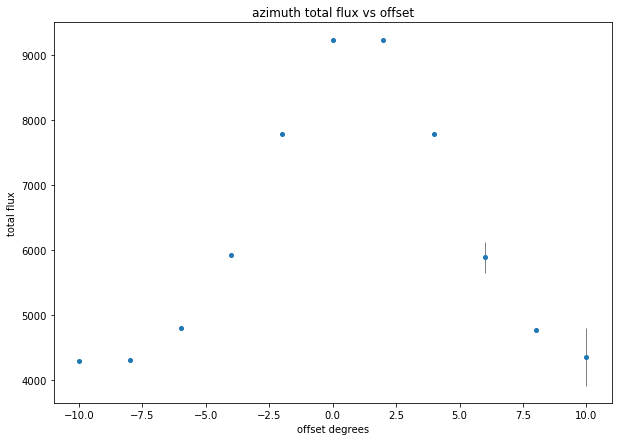

In [311]:
azimuth = np.array([azm10_int,azm8_int,azm6_int,azm4_int,azm2_int,azm0_int,azp2_int,azp4_int,azp6_int,azp8_int,azp10_int])
offset2 = np.array([-10,-8,-6,-4,-2,0,2,4,6,8,10])
#plt.scatter(offset2,azimuth)
plt.errorbar(offset2, azimuth, yerr_az, xerr_az,fmt = 'o',  ecolor = 'gray', lw = 1, ms = 4)
plt.xlabel("offset degrees")
plt.ylabel("total flux")
plt.title("azimuth total flux vs offset")
plt.show()

Error bars are plotted above, but most are too small to be noticable, except for the positive 6 and 10 degree offset. The plot is essentially the integrated total flux of each SRT scan at each degree offset from the inread data. The shape is approximately gaussian.

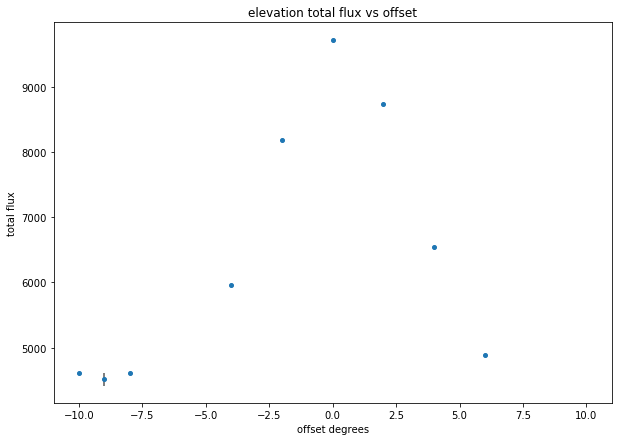

In [312]:
elevation = np.array([elm10_int,elm8_int,elm6_int,elm4_int,elm2_int,elm0_int,elp2_int,elp4_int,elp6_int])
offset1 = np.array([-10,-8,-9,-4,-2,0,2,4,6])
#plt.scatter(offset1,elevation)
plt.errorbar(offset1, elevation, yerr_el, xerr_el,fmt = 'o',  ecolor = 'gray', lw = 2, ms = 4)
plt.xlim([-11, 11])
plt.xlabel("offset degrees")
plt.ylabel("total flux")
plt.title("elevation total flux vs offset")
plt.show()

Error bars are plotted above, but are too small to be noticable, except for the negative nine degree offset. Like the azimuth plot, this plot is  the integrated total flux of each SRT scan at each degree offset from the inread data vs the offset, and the shape is approximately gaussian.

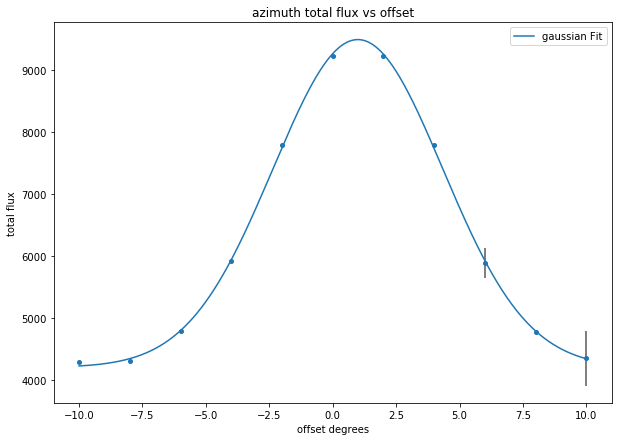

In [313]:
def gauss(x, *p):                                                             
        A, mu, sigma = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2)) + 4200

x0 = offset2
y0 = azimuth
p0 = [9000., 1., 2.]
coeff_a, var_matrix = curve_fit(gauss, x0, y0, p0=p0)
x_range = np.linspace(-10,10,1000)
hist_fit = gauss(x_range, *coeff_a)

plt.errorbar(offset2, azimuth, yerr_az, xerr_az,fmt = 'o',  ecolor = 'gray', lw = 2, ms = 4)
plt.plot(x_range,hist_fit,label='gaussian Fit')
plt.xlabel("offset degrees")
plt.ylabel("total flux")
plt.title("azimuth total flux vs offset")
plt.legend()
plt.show()

Above is the plotted gaussian fit for the azimuth total flux plot, with error bars included (same as above). Below are the fit parameters of the fitted gaussian function.

In [314]:
print(coeff_a)

[  5.29251790e+03   9.91287965e-01   3.34442176e+00]


For the elevation gaussian fit, the fit parameters are:

|$A$  | $\mu$|$\sigma$|
|-----|------|--------|
|5.3e3|9.9e-1| 3.3    |

In [315]:
fwhm_elevation = 2.355 * coeff_a[2]
print("THE FWHM OF ELEVATION IS: ",fwhm_elevation)

THE FWHM OF ELEVATION IS:  7.876113238


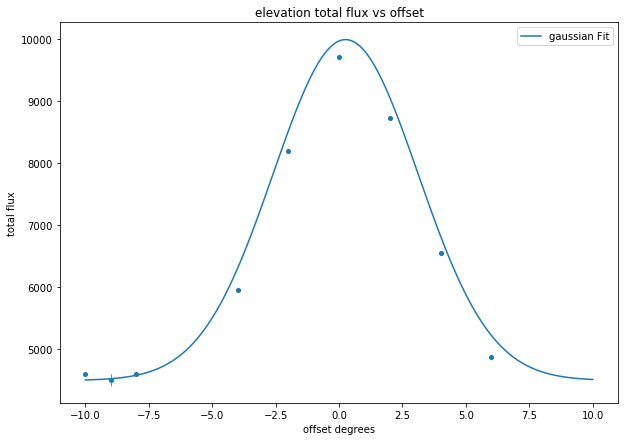

In [316]:
def gauss2(x, *p):                                                             
        A, mu, sigma = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2)) + 4500

x0 = offset1
y0 = elevation
p0 = [9000., 0., 2.]
coeff_e, var_matrix = curve_fit(gauss, x0, y0, p0=p0)
hist_fit = gauss2(x_range, *coeff_e)

plt.errorbar(offset1, elevation, yerr_el, xerr_el,fmt = 'o',  ecolor = 'gray', lw = 1, ms = 4)
plt.plot(x_range,hist_fit,label='gaussian Fit')
plt.xlabel("offset degrees")
plt.ylabel("total flux")
plt.title("elevation total flux vs offset")
plt.legend()
plt.show()

ABove is the overplotted gaussian fit for the elevation total flux plot, with error bars. Below are the fit parameters.

In [317]:
print(coeff_e)

[  5.49011384e+03   2.57380658e-01   2.85675297e+00]


For the azimuth gaussian fit, the fit parameters are:

|$A$  | $\mu$|$\sigma$|
|-----|------|--------|
|5.5e3|2.6e-1| 2.9    |

In [318]:
fwhm_elevation = 2.355 * coeff_e[2]
print("FWHM FOR ELEVATION IS: ",fwhm_elevation)

FWHM FOR ELEVATION IS:  6.7276532363


The angular diameter of the sun is ~0.53 degrees, or 0.0093 radians. 

The beamwidth of the SRT can be estimated from our two values of FWHM of gaussian fit of total flux vs offset. For elevation, FWHM = 6.73, while for azimuth, FWHM = 7.88. Thus, 6.73 is the beamwidth of the SRT in units of degrees of elevation, and 7.88 is the beamwidth in units of degrees of azimuth.

Because of the missing data points for the elevation scans, we will assume here that the beamwidth is 7.88, and discard the elevation FWHM.

Thus, the angular diameter of the sun is significantly smaller than the SRT beamwidth, by
$\frac{0.53}{7.88}\cdot100 = 6.7 \%$. 

This result makes sense because only astronomical sources with an angular scale larger than the telescopes beam can be used to get a good measurement of a radio telescope's beam width. Thus, the sun is a good object for computing the SRT beamwidth, as it has an angular diameter much smaller than the beamwidth. 

The SRT has diameter of 2.1 meters. Thus, the expected angular resolution is given by $1.15 \cdot \frac{\lambda}{2.1} \approx 0.115 radians = 6.59 degrees$.

This theoretical expected resolution closeley matches the measured beamwidth of the SRT.

#### Summary - 2.5 points

In this lab, we used the SRT on the roof of Angell Hall determine the beam size of the telescope, by scanning the sun in elevation and azimuthal directions. On the SRT controllers, te center brightest point was determined manually, and degree offsets in steps of 2 were emplyed to observe the sun for 10 seconds approximately. 

The spectrum data from these observations, at each offset, were read in and averaged, and the standard error of the integrated total flux was computed by computing the standard deviation of the individual integration of each data in each file, and divided by the square root of the number of data points. The error bars were plotted with the total flux, versus the offset degree. A gaussian function was then fit to both the elevation and azimuth plots, and the FWHM was computed.

#### Conclusion - 2.5 points

From this lab, we have computed that for elevation, FWHM = 6.73, while for azimuth, FWHM = 7.88. Thus, 6.73 is the beamwidth of the SRT in units of degrees of elevation, and 7.88 is the beamwidth in units of degrees of azimuth. We derived the FWHM from the gaussian fits of the total flux vs offset plots. Becuase the angular diameter of the sun is much smaller than the beamwidth of the SRT, the measured beamwidth is accurate. However, we do not see the true image of the sun - thus, instead we accurately measure the resolution of the SRT as the main purpose of this lab. We confirm that the theoretical value for the beamwidth, 6.59 degrees, is consisten with the measured beamwidth.